In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('std_dependence_results.json') as f:
    data = json.load(f)

In [3]:
iterations = []
containers_load_time = []
airplane_80_load_time = []
airplane_140_load_time = []

for k, v in data.items():
    for item in v:
        iterations.append(k)
        containers_load_time.append(item[0])
        airplane_80_load_time.append(item[1]['80'])
        if '140' in item[1].keys():
            airplane_140_load_time.append(item[1]['140'])
        else:
            airplane_140_load_time.append([np.nan, np.nan])
        
df = pd.DataFrame({'iterations': iterations, 'containers_load_time': containers_load_time,
                   'airplane_80_load_time': airplane_80_load_time, 'airplane_140_load_time': airplane_140_load_time})
df['iterations'] = df['iterations'].astype('int32')
df['airplane_80_load_time'] = df['airplane_80_load_time'].apply(lambda x: x[0])
df['airplane_140_load_time'] = df['airplane_140_load_time'].apply(lambda x: x[0])
df.head(7)

,iterations,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,10,990.0,192.250000,609.000000
1,10,995.0,188.941176,620.888889
2,10,995.0,177.705882,698.666667
3,10,975.0,183.060606,624.666667
4,10,980.0,166.942857,750.625000
5,10,980.0,173.428571,734.750000
6,10,995.0,181.352941,642.666667


In [4]:
df_mean = df.groupby('iterations').agg({'containers_load_time': np.mean, 'airplane_80_load_time': np.mean, 'airplane_140_load_time': np.mean}).reset_index(drop=False)
df_mean.head(5)

,iterations,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,10,987.500000,180.356795,665.070833
1,11,991.437848,174.938585,629.686616
2,12,991.666667,176.237760,655.880324
3,13,988.846154,179.257501,636.114103
4,14,987.500000,180.129830,641.085714


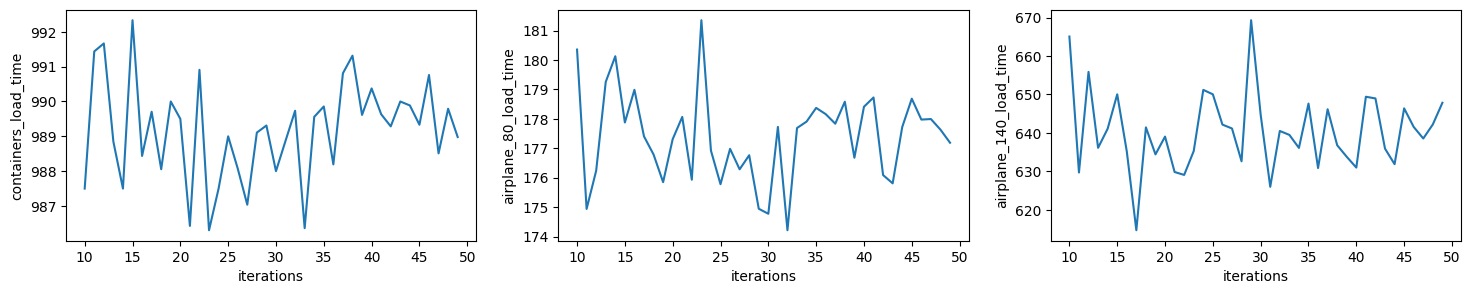

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
sns.lineplot(data=df_mean, x='iterations', y='containers_load_time', ax=ax[0])
sns.lineplot(data=df_mean, x='iterations', y='airplane_80_load_time', ax=ax[1])
sns.lineplot(data=df_mean, x='iterations', y='airplane_140_load_time', ax=ax[2])
plt.show()

In [6]:
df_std = df.groupby('iterations').agg({'containers_load_time': np.std, 'airplane_80_load_time': np.std, 'airplane_140_load_time': np.std}).reset_index(drop=False)
df_std.head(5)

,iterations,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,10,8.897565,7.920099,50.254918
1,11,6.975660,4.992672,108.729256
2,12,6.853444,4.170744,41.120555
3,13,8.454251,9.864786,46.514446
4,14,8.492078,6.945372,37.825262


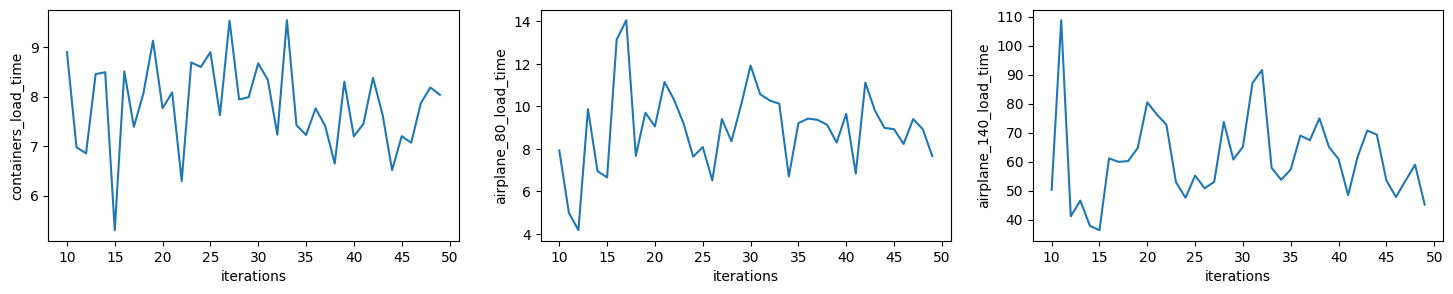

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
sns.lineplot(data=df_std, x='iterations', y='containers_load_time', ax=ax[0])
sns.lineplot(data=df_std, x='iterations', y='airplane_80_load_time', ax=ax[1])
sns.lineplot(data=df_std, x='iterations', y='airplane_140_load_time', ax=ax[2])
plt.show()